# 데이터

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_Gen = ImageDataGenerator (
    rescale = 1./255, 
    horizontal_flip = True,         # 수평선을 기준으로 반전
    vertical_flip = True,           # 수직선을 기준으로 반전
    width_shift_range = 0.1,        # 10% 만큼 가로 이동
    height_shift_range = 0.1,       # 10% 만큼 세로 이동
    rotation_range = 5,             # 회전
    zoom_range = 0.7,               # 확대
    shear_range = 0.7,              # 엇갈림
    fill_mode = 'nearest'           # 축 이동을 했을 때 비는 부분을 가까운 값으로 채운다.
)

test_data_Gen = ImageDataGenerator (
    rescale = 1./255                # 테스트 데이터는 리스케일링만 한다.: 평가에 쓰이는 테스트 데이터는 증폭시키지 않은 원 데이터 사용
)

xy_train = train_data_Gen.flow_from_directory (
    'C:/study/keras/keras_data/brain/train',
    target_size=(100,100),
    batch_size=10,                  # 10개씩 자르므로 16번 돈다.
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

# ad(alzheimer disease) = 0, normal = 1  
# x = (160, 150, 150, 1), y = (160,) → 흑백 image 
# 160장 중에 ad, normal 각 80장씩
# np.unique = 0, 1

xy_test = train_data_Gen.flow_from_directory (
    'C:/study/keras/keras_data/brain/test',
    target_size=(100,100),
    batch_size=10,                  # 10개씩 자르므로 16행 (16번 돈다.)
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

# print(xy_train, '\n', xy_test)    # <keras.preprocessing.image.DirectoryIterator object at 0x000002862718CAC0> 
# print(xy_train[0])                # x data와 y data 개수, y data 개수 = batch_size 개수 만큼
# print(xy_train[0][0])
# print(xy_train[0][1])
print(len(xy_train[0]))  
print(xy_train[0][0].shape)         # x (10 = batch_size)
print(xy_train[0][1].shape)         # y
print(xy_train[1][0].shape)         # x
print(xy_train[1][1].shape)         # y
print(xy_train[1][1].shape)         # y
# xy_train[15][1] 까지 있음



# batch_size를 전체 데이터보다 최대한 크게 끔 지정하면 전체 데이터의 개수를 알 수 있다.
 
print(type(xy_train)) 
print(type(xy_train[0]))             # 튜플은 변경 불가
print(type(xy_train[0][0]))
print(type(xy_train[0][1]))

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
2
(10, 100, 100, 1)
(10,)
(10, 100, 100, 1)
(10,)
(10,)
<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


 # 이미지 출력

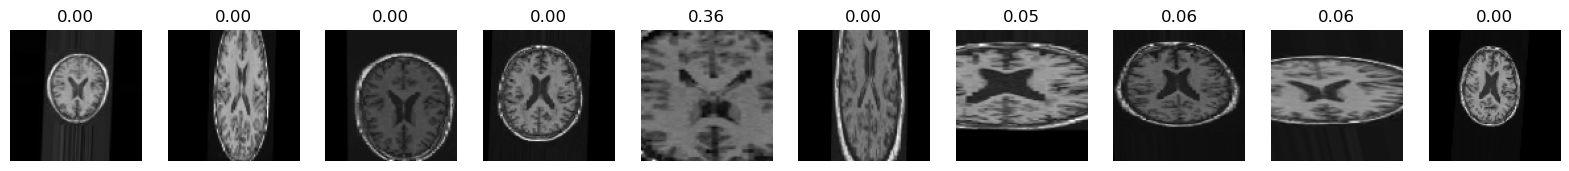

In [10]:
import matplotlib.pyplot as plt

img = xy_train[0] # img = xy_train.__getitem__(10)
plt.figure(figsize=(20, 5))
for i, img in enumerate(img[0]):
    plt.subplot(1, 10, i+1) # 행, 열, 인덱스
    plt.title('%.2f' % img[1][i])
    plt.axis('off') # 축 표시 X
    plt.imshow(img.squeeze(), 'gray') #차원 = 1인 차원을 제거

 # 모델

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, (2,2), input_shape=(100, 100, 1), activation='relu'))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

 # 컴파일, 훈련

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
hist = model.fit_generator(xy_train, steps_per_epoch=16, epochs=128, validation_data=xy_test, validation_steps=4)  # steps_per_epoch: 1 에포크 당 배치 사이즈에 따른 훈련 횟수

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
print('acc: ', acc[-1])
print('loss: ', loss[-1])
print('val_acc: ', val_acc[-1])
print('val_loss: ', val_loss[-1])

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_26036\2506164858.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(xy_train, steps_per_epoch=16, epochs=128, validation_data=xy_test, validation_steps=4)  # steps_per_epoch: 1 에포크 당 배치 사이즈에 따른 훈련 횟수


Epoch 1/128
16/16 [==============================] - 3s 29ms/step - loss: 0.7164 - acc: 0.5063 - val_loss: 0.6855 - val_acc: 0.5500
Epoch 2/128
16/16 [==============================] - 0s 21ms/step - loss: 0.7038 - acc: 0.5188 - val_loss: 0.7075 - val_acc: 0.5250
Epoch 3/128
16/16 [==============================] - 0s 20ms/step - loss: 0.6965 - acc: 0.5250 - val_loss: 0.6851 - val_acc: 0.6500
Epoch 4/128
16/16 [==============================] - 0s 20ms/step - loss: 0.6816 - acc: 0.5813 - val_loss: 0.6623 - val_acc: 0.5750
Epoch 5/128
16/16 [==============================] - 0s 19ms/step - loss: 0.6894 - acc: 0.5312 - val_loss: 0.6205 - val_acc: 0.7250
Epoch 6/128
16/16 [==============================] - 0s 20ms/step - loss: 0.6306 - acc: 0.6625 - val_loss: 0.5575 - val_acc: 0.7750
Epoch 7/128
16/16 [==============================] - 0s 20ms/step - loss: 0.5936 - acc: 0.7250 - val_loss: 0.5345 - val_acc: 0.8000
Epoch 8/128
16/16 [==============================] - 0s 21ms/step - loss: 0.